In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
from qiskit import Aer

C:\Users\shiva\AppData\Local\Temp\ipykernel_5572\1604333341.py:7: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [2]:
crop_data = pd.read_csv('Crop_recommendation.csv')

In [3]:
features = crop_data.iloc[:, :-1].values
labels = crop_data.iloc[:, -1].values

In [4]:
print(features)

[[ 90.          42.          43.         ...  82.00274423   6.50298529
  202.9355362 ]
 [ 85.          58.          41.         ...  80.31964408   7.03809636
  226.6555374 ]
 [ 60.          55.          44.         ...  82.3207629    7.84020714
  263.9642476 ]
 ...
 [118.          33.          30.         ...  67.22512329   6.36260785
  173.3228386 ]
 [117.          32.          34.         ...  52.12739421   6.75879255
  127.1752928 ]
 [104.          18.          30.         ...  60.39647474   6.77983261
  140.9370415 ]]


In [5]:
features = MinMaxScaler().fit_transform(features)

In [6]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.7, random_state=123 
)

In [7]:
svc = SVC()
svc.fit(train_features, train_labels)

SVC()

In [8]:
train_score_c = svc.score(train_features, train_labels)
test_score_c = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c:.2f}")i
print(f"Classical SVC on the test dataset:     {test_score_c:.2f}")

Classical SVC on the training dataset: 0.98
Classical SVC on the test dataset:     0.99


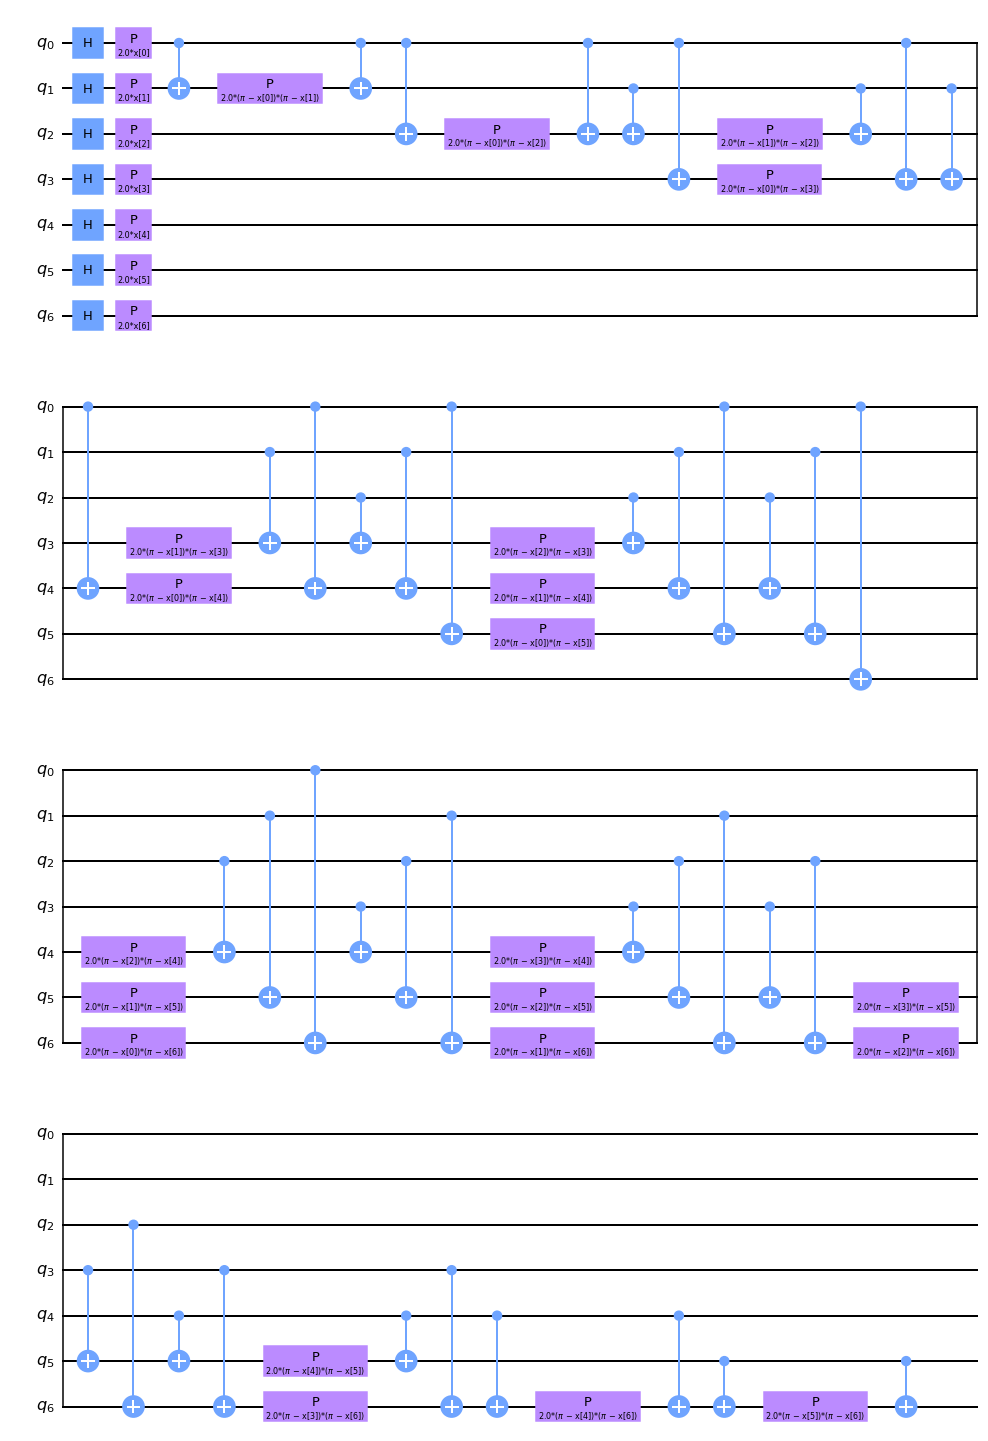

In [9]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

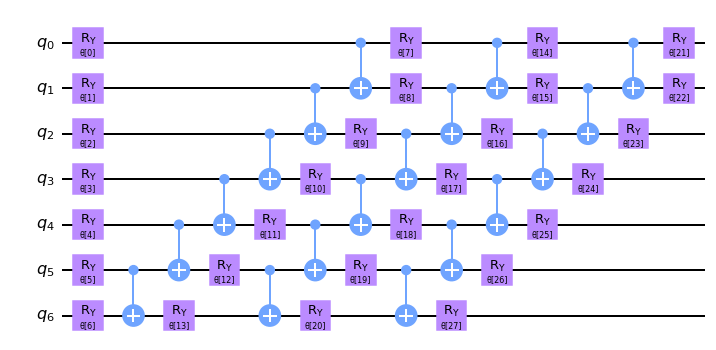

In [10]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [11]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=100)

In [12]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [13]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

<AxesSubplot:>

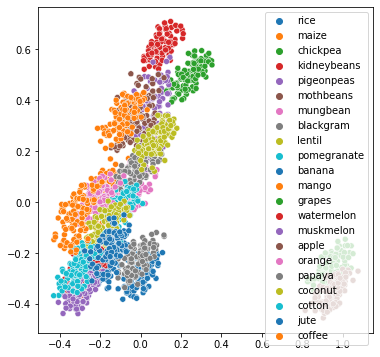

In [14]:
#reducing the no of features in this CASE

from sklearn.decomposition import PCA

features = PCA(n_components=2).fit_transform(features)

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

In [16]:
print(feature_map)

     ┌───────────────────────────────────────────────────┐
q_0: ┤0                                                  ├
     │                                                   │
q_1: ┤1                                                  ├
     │                                                   │
q_2: ┤2                                                  ├
     │                                                   │
q_3: ┤3 ZZFeatureMap(x[0],x[1],x[2],x[3],x[4],x[5],x[6]) ├
     │                                                   │
q_4: ┤4                                                  ├
     │                                                   │
q_5: ┤5                                                  ├
     │                                                   │
q_6: ┤6                                                  ├
     └───────────────────────────────────────────────────┘


In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=125
)

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.63
Classical SVC on the test dataset:     0.64


In [20]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

In [21]:
optimizer = COBYLA(maxiter=40)


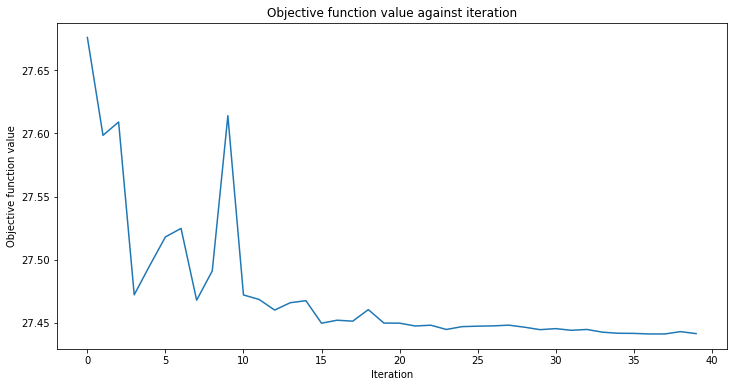

Training time: 560 seconds


In [23]:
import time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

#make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")


In [24]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.15
Quantum VQC on the test dataset using RealAmplitudes:     0.19


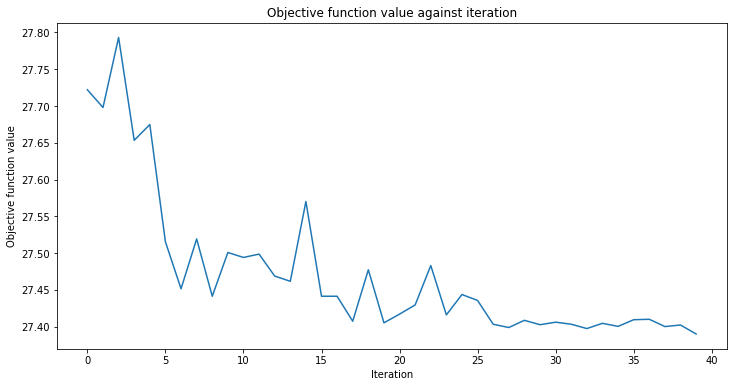

Training time: 661 seconds


In [25]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")